In [1]:
# !pip3 install --upgrade Pillow --quiet 

In [2]:
from PIL import Image, ImageDraw, ImageFont
import random
import os
from IPython.display import Image as ImageDisplayer # use alias to prevent mixup

### Original Image

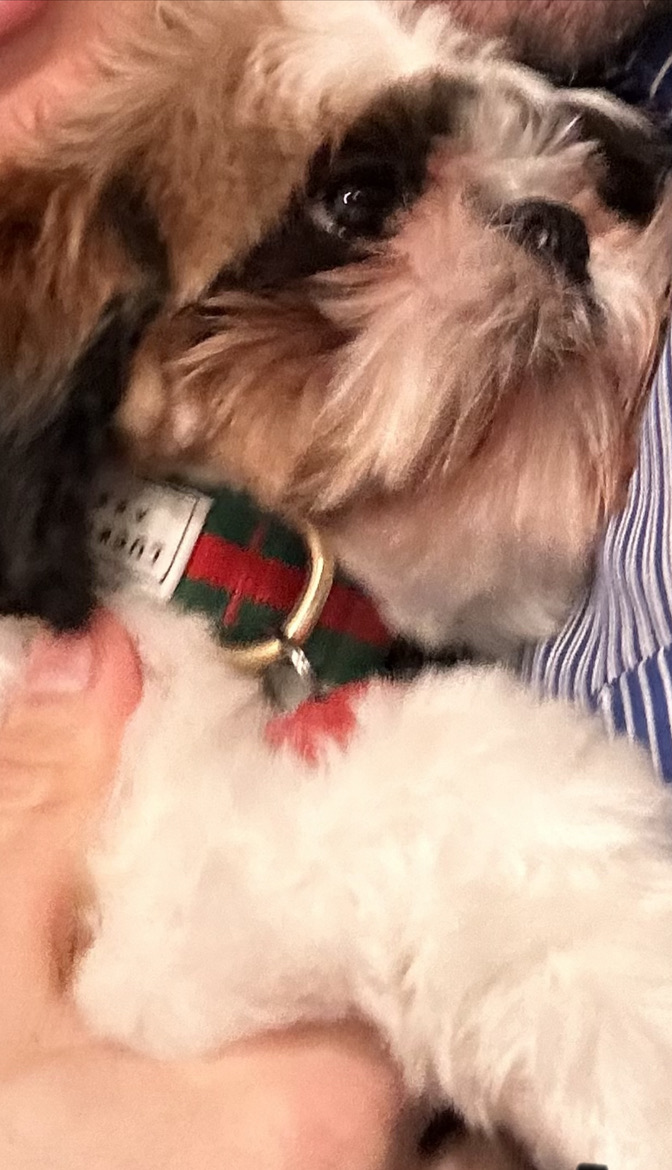

In [3]:
ImageDisplayer(filename='chicken.jpeg')

In [4]:
# open the image file
image_path = os.path.join('.', 'chicken.jpeg')
image = Image.open(image_path)

# define the font size and font type
font_size = 20
font_path = os.path.join('Fonts', 'consola.ttf')

# check if font file exists
if os.path.exists(font_path):
    font = ImageFont.truetype(font_path, font_size)
else:
    font = ImageFont.load_default()

# define the width and height of each character
char_width = 11
char_height = 19

# define the number of characters per row and column
num_chars_per_row = min((image.width // char_width), 126)
num_chars_per_col = min((image.height // char_height), 126)

## Version #1

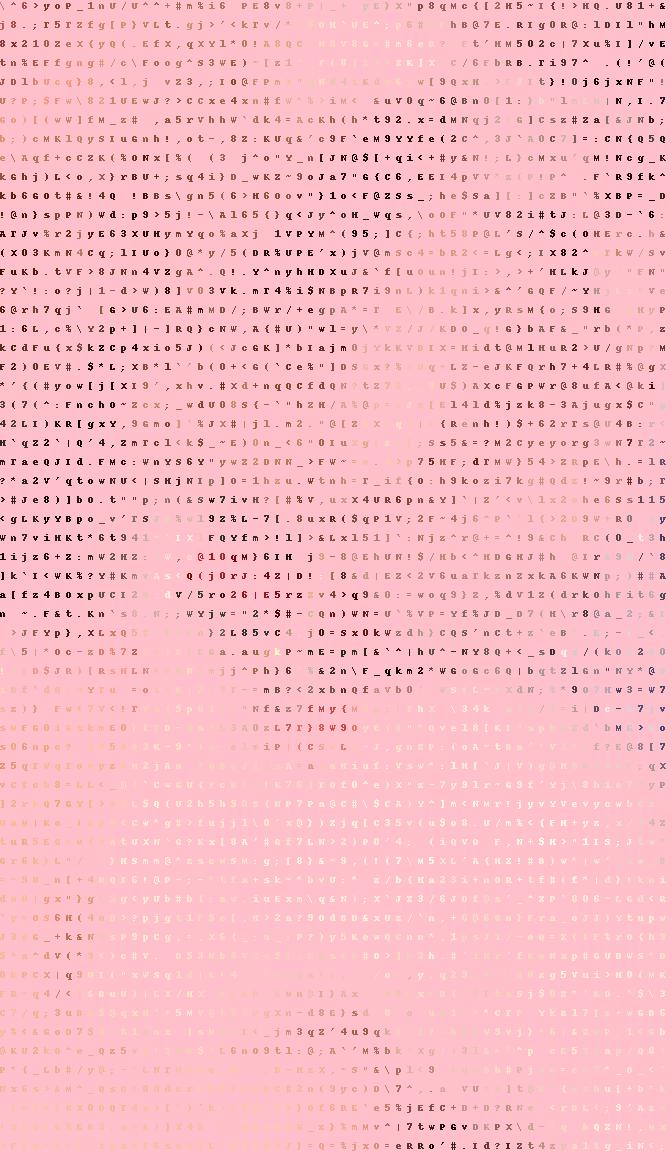

In [5]:
# create a new image with white background
new_image = Image.new("RGB", (image.width, image.height), "pink")

# draw random characters on the new image
draw = ImageDraw.Draw(new_image)
for row in range(num_chars_per_row):
    for col in range(num_chars_per_col):
        px = col * char_width
        py = row * char_height
        if px < image.width and py < image.height:
            color = image.getpixel((px, py))
            char = chr(random.randint(32, 126))
            draw.text((px, py),
                    char,
                    fill=color,
                    font=font)

# save the new image
new_image.save('chicken_in_text.jpeg')

# display image
ImageDisplayer(filename='chicken_in_text.jpeg')

## Version #2

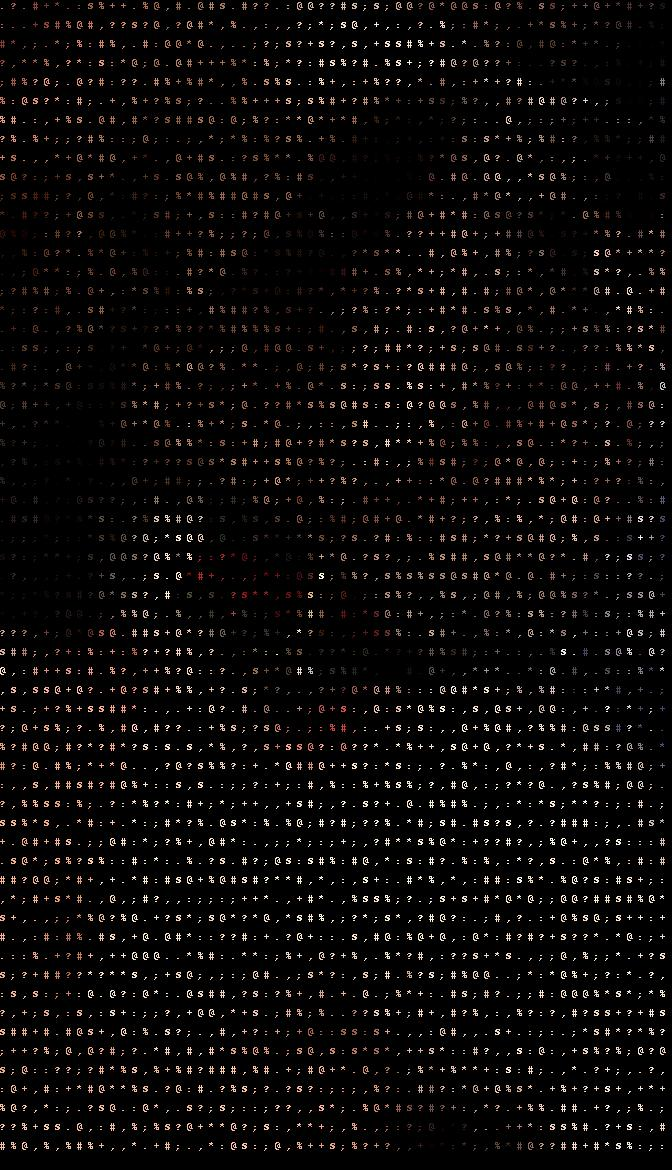

In [6]:
# create a new image with black background
new_image = Image.new("RGB", (image.width, image.height), "black")

# Define a list of characters to use (from darkest to lightest)
chars = ['@', '#', 'S', '%', '?', '*', '+', ';', ':', ',', '.']

# draw random characters on the new image
draw = ImageDraw.Draw(new_image)
for row in range(num_chars_per_row):
    for col in range(num_chars_per_col):
        px = col * char_width
        py = row * char_height
        if px < image.width and py < image.height:
            color = image.getpixel((px, py))
            char = random.choice(chars)
            draw.text((px, py),
                    char,
                    fill=color,
                    font=font)

# save the new image
new_image.save('chicken_in_text2.jpeg')

# display image
ImageDisplayer(filename='chicken_in_text2.jpeg')


## Version #3

In [7]:
def draw_image(chars=['.', ':', '@'], file_name='chicken.jpeg', font_size=20):
    """
    Generates a new image file where the original image is replaced by randomly selected characters.

    Parameters:
    -----------
    chars : list, optional
        List of characters to be used for drawing the new image. Default is ['.':, '@'].
    file_name : str, optional
        Name of the image file to be used as input. Default is 'chicken.jpeg'.
    font_size : int, optional
        Font size to be used for drawing characters on the new image. Default is 20.

    Returns:
    --------
    ImageDisplayer
        Object used to display the generated image.

    Raises:
    -------
    OSError
        If the font file specified in the function does not exist.
    """

    # open the image file
    image_path = os.path.join('.', f'{file_name}')
    image = Image.open(image_path)

    # define the font size and font type
    font_path = os.path.join('~/Library/Fonts/', 'Barracuda-regular.ttf')
     
    # check if font file exists otherwise set it to default font
    font = ImageFont.truetype(font_path, font_size) \
        if font_path else ImageFont.load_default()

    # define the width and height of each character
    char_width = 11
    char_height = 19

    # define the number of characters per row and column
    num_chars_per_row = min((image.width // char_width), 126)
    num_chars_per_col = min((image.height // char_height), 126)

    # create a new image with black background
    new_image = Image.new("RGB", (image.width, image.height), "black")

    # draw random characters on the new image
    draw = ImageDraw.Draw(new_image)
    for row in range(num_chars_per_row):
        for col in range(num_chars_per_col):
            px = col * char_width
            py = row * char_height
            if px < image.width and py < image.height:
                color = image.getpixel((px, py))
                char = random.choice(chars)
                draw.text((px, py),
                          char,
                          fill=color,
                          font=font)

    # save the new image
    new_image_file_name = f"{file_name.split('.')[0]}_in_{''.join(char for char in chars)}.jpeg"
    new_image.save(new_image_file_name)

    # display image
    return ImageDisplayer(filename=new_image_file_name)


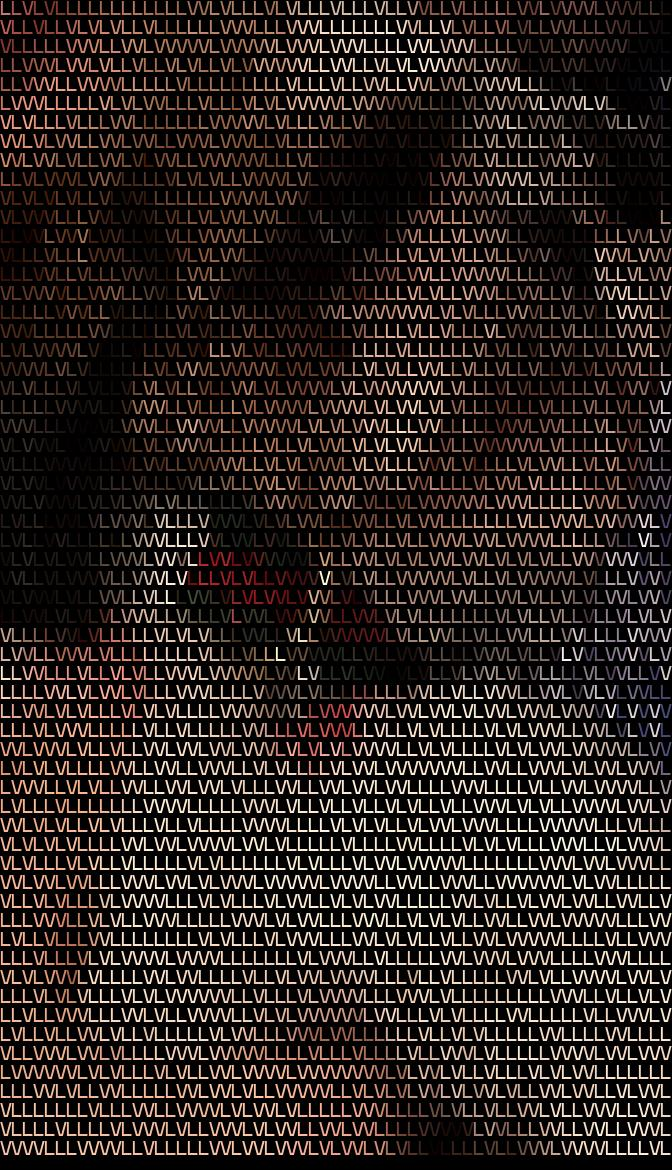

In [8]:
# Define a list of characters to use (from darkest to lightest)
char_list = ['L', 'V']
draw_image(chars=char_list)